## TASK- 8 The Sparks Foundation(GRIP)
# Timeline Analysis : Covid-19
# #GRIPFEB21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
covid_data = pd.read_csv("owid-covid-data.csv");
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70221,ZWE,Africa,Zimbabwe,2021-02-16,35315.0,93.0,76.286,1414.0,4.0,8.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70222,ZWE,Africa,Zimbabwe,2021-02-17,35423.0,108.0,79.857,1418.0,4.0,7.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70223,ZWE,Africa,Zimbabwe,2021-02-18,35543.0,120.0,97.000,1420.0,2.0,8.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70224,ZWE,Africa,Zimbabwe,2021-02-19,35710.0,167.0,95.000,1430.0,10.0,5.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [3]:
covid_data.shape

(70226, 59)

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70226 entries, 0 to 70225
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70226 non-null  object 
 1   continent                              66727 non-null  object 
 2   location                               70226 non-null  object 
 3   date                                   70226 non-null  object 
 4   total_cases                            69341 non-null  float64
 5   new_cases                              69339 non-null  float64
 6   new_cases_smoothed                     68338 non-null  float64
 7   total_deaths                           60350 non-null  float64
 8   new_deaths                             60508 non-null  float64
 9   new_deaths_smoothed                    68338 non-null  float64
 10  total_cases_per_million                68961 non-null  float64
 11  ne

In [5]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [6]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.934100e+04,69339.000000,68338.000000,6.035000e+04,60508.000000,68338.000000,68961.000000,68959.000000,67963.000000,59983.000000,...,64102.000000,43799.000000,64706.000000,65504.000000,50952.000000,50253.000000,32452.000000,59315.000000,66731.000000,64685.000000
mean,5.792029e+05,5081.614070,5102.062060,1.770522e+04,130.729788,114.321363,6780.446851,63.849062,63.846643,163.746091,...,19147.918808,13.237031,256.923196,7.788935,10.563802,32.649564,51.046583,3.038729,73.138998,0.728231
std,4.099299e+06,32208.889282,31979.788989,1.027567e+05,719.360318,654.599841,13503.110460,165.802202,138.976912,293.989729,...,19685.047181,19.905648,118.308629,3.923257,10.413924,13.460992,31.770090,2.468723,7.550035,0.150145
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,6.740000e+02,1.000000,5.429000,3.500000e+01,0.000000,0.000000,130.047000,0.122000,0.947500,5.254000,...,4541.795000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.602000
50%,7.189000e+03,56.000000,67.214500,2.290000e+02,2.000000,1.000000,980.312000,5.918000,7.905000,28.702000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,7.858900e+04,643.000000,669.000000,2.123750e+03,16.000000,11.714000,6121.235000,52.470500,59.402500,172.500500,...,27216.445000,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.110739e+08,879905.000000,738686.000000,2.460534e+06,17838.000000,14374.143000,138122.047000,8652.658000,2648.773000,2121.516000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [7]:
covid_data.nunique()

iso_code                                   213
continent                                    6
location                                   213
date                                       417
total_cases                              36093
new_cases                                 9733
new_cases_smoothed                       18462
total_deaths                             13643
new_deaths                                2390
new_deaths_smoothed                       5327
total_cases_per_million                  53042
new_cases_per_million                    30425
new_cases_smoothed_per_million           34194
total_deaths_per_million                 31822
new_deaths_per_million                    6199
new_deaths_smoothed_per_million           7366
reproduction_rate                          354
icu_patients                              2029
icu_patients_per_million                  4156
hosp_patients                             3857
hosp_patients_per_million                 6620
weekly_icu_ad

In [8]:
covid_data.isnull().sum()

iso_code                                     0
continent                                 3499
location                                     0
date                                         0
total_cases                                885
new_cases                                  887
new_cases_smoothed                        1888
total_deaths                              9876
new_deaths                                9718
new_deaths_smoothed                       1888
total_cases_per_million                   1265
new_cases_per_million                     1267
new_cases_smoothed_per_million            2263
total_deaths_per_million                 10243
new_deaths_per_million                   10085
new_deaths_smoothed_per_million           2263
reproduction_rate                        13850
icu_patients                             62753
icu_patients_per_million                 62753
hosp_patients                            61344
hosp_patients_per_million                61344
weekly_icu_ad

In [9]:
df= covid_data 
df=df.replace(np.nan, 0)

In [10]:
df.isnull().sum()

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp

In [11]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           18464
Europe           16981
Asia             16824
North America     8224
South America     4280
Oceania           1954
Name: continent, dtype: int64

In [12]:
# Analyzing cases worldwide 
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
639,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1363,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1719,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2057,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2412,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
2829,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3186,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
3582,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# looking at different locations
covid_data["location"].value_counts()

Argentina          417
Mexico             417
Thailand           414
Taiwan             402
South Korea        397
                  ... 
Macao               11
Anguilla            10
Northern Cyprus      9
Greenland            1
Saint Helena         1
Name: location, Length: 213, dtype: int64

In [14]:
# covid cases in india

india=df[df["location"]=="India"]
india.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
29208,IND,Asia,India,2021-02-16,10937320.0,11610.0,11278.429,155913.0,100.0,94.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
29209,IND,Asia,India,2021-02-17,10950201.0,12881.0,11272.429,156014.0,101.0,93.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
29210,IND,Asia,India,2021-02-18,10963394.0,13193.0,11827.286,156111.0,97.0,94.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
29211,IND,Asia,India,2021-02-19,10977387.0,13993.0,12091.571,156212.0,101.0,94.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
29212,IND,Asia,India,2021-02-20,10991651.0,14264.0,12387.286,156302.0,90.0,94.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [15]:
india_last_5_days=india.tail()

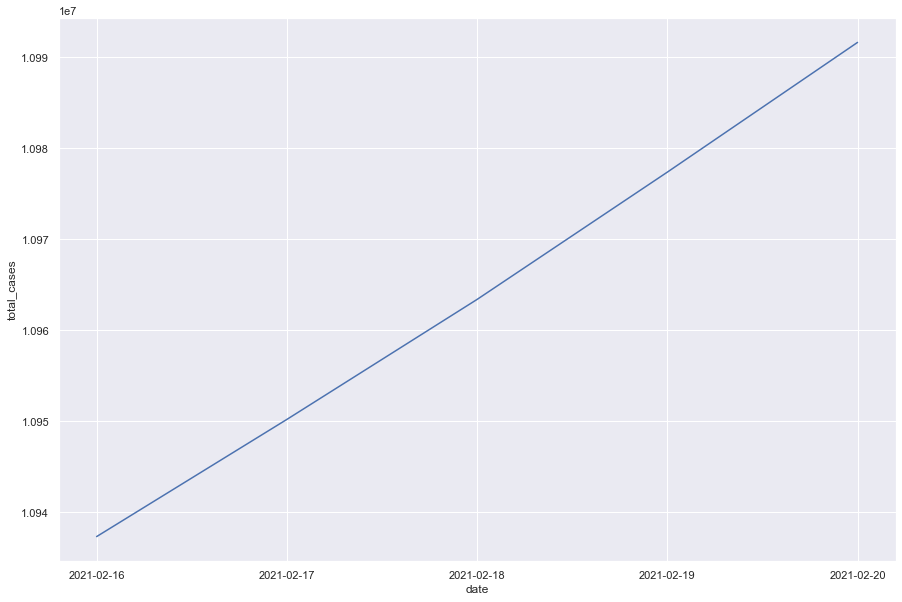

In [16]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

In [17]:
brazil=df[df["location"]=="Brazil"]
brazil.head()
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9384,BRA,South America,Brazil,2021-02-16,9921981.0,55271.0,46059.429,240940.0,1167.0,1060.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9385,BRA,South America,Brazil,2021-02-17,9978747.0,56766.0,45654.286,242090.0,1150.0,1034.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9386,BRA,South America,Brazil,2021-02-18,10030626.0,51879.0,45245.286,243457.0,1367.0,1036.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9387,BRA,South America,Brazil,2021-02-19,10084208.0,53582.0,45536.143,244737.0,1280.0,1035.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9388,BRA,South America,Brazil,2021-02-20,10139148.0,54940.0,47056.286,245977.0,1240.0,1063.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765


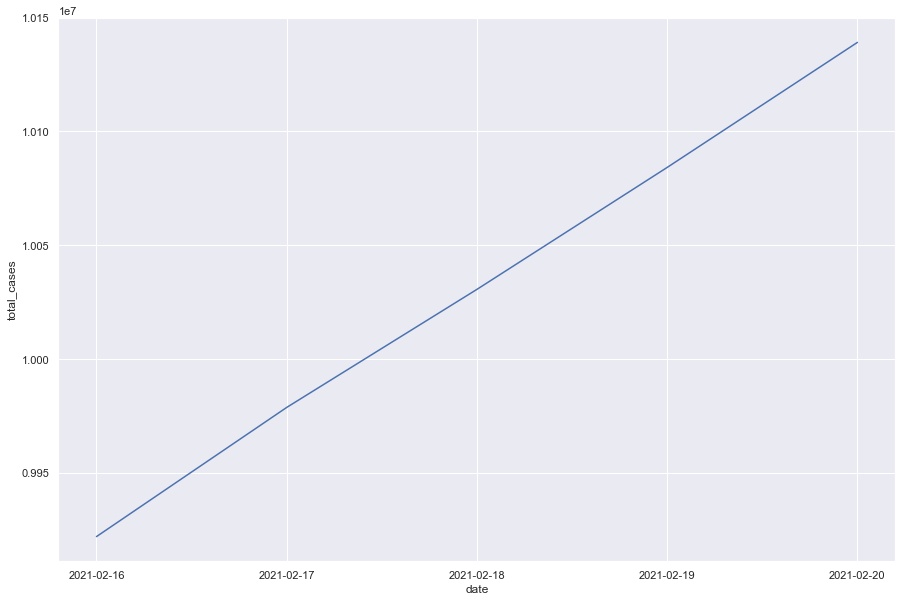

In [18]:
brazil_last_5_days=brazil.tail()
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [19]:
# understanding cases of india,china and japan

india_japan_china=df[(df["location"]=="India") | (df["location"]=="China") | (df["location"]=="Japan")]

In [20]:
# getting latset data

last_day_cases=df[(df["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.511
672,OWID_AFR,0,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1034,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.795
1396,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
1752,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68770,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
69166,OWID_WRL,0,World,2020-12-18,75761111.0,719381.0,645058.429,1680847.0,12771.0,11573.000,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
69483,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
69823,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [21]:

# sorting date w.r.t to total cases

max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
69166,OWID_WRL,0,World,2020-12-18,75761111.0,719381.0,645058.429,1680847.0,12771.0,11573.000,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
21763,OWID_EUR,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
46458,OWID_NAM,0,North America,2020-12-18,20222858.0,276458.0,243086.857,468708.0,3915.0,3529.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
3615,OWID_ASI,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
66888,USA,North America,United States,2020-12-18,17546621.0,251161.0,220280.286,319223.0,2949.0,2711.000,...,54225.446,1.2,151.089,10.79,19.100,24.600,0.000,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68031,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,75.12,0.000
57415,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,0.0,0.0,0.000,...,2205.923,25.1,459.780,18.68,0.000,0.000,35.890,1.400,73.00,0.567
39991,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,0.0,0.0,0.000,...,3819.202,0.0,557.793,30.53,0.000,0.000,82.502,2.700,73.70,0.704
53723,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,0.0,0.0,0.000,...,6021.557,0.0,348.977,9.21,16.700,38.100,0.000,0.000,73.32,0.715


In [22]:
# top 5 countries with maximum case
max_cases_country[1:6]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
21763,OWID_EUR,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
46458,OWID_NAM,0,North America,2020-12-18,20222858.0,276458.0,243086.857,468708.0,3915.0,3529.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
3615,OWID_ASI,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
66888,USA,North America,United States,2020-12-18,17546621.0,251161.0,220280.286,319223.0,2949.0,2711.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
22158,OWID_EUN,0,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000


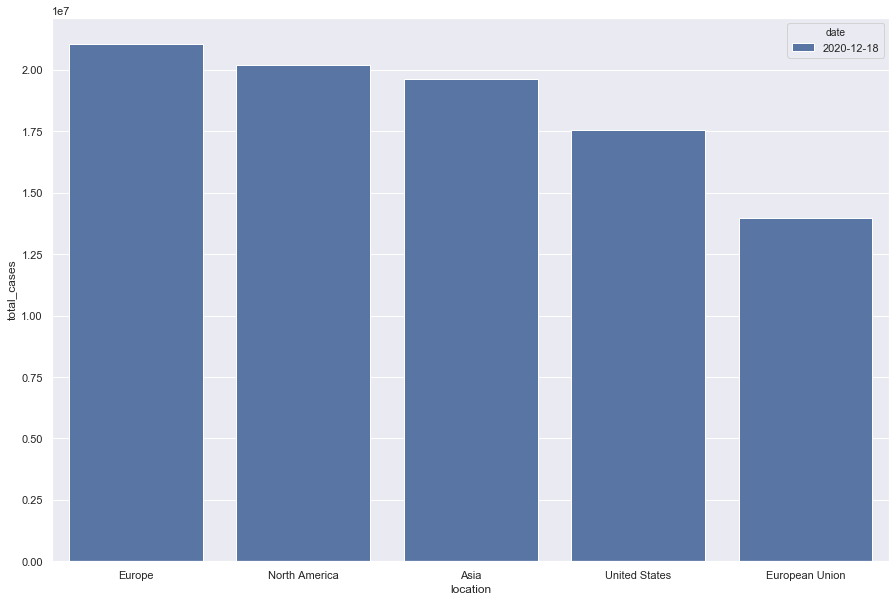

In [23]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()

In [24]:
df1=pd.qcut(df['life_expectancy'], q=20)

In [25]:
df1

0        (64.26, 66.47]
1        (64.26, 66.47]
2        (64.26, 66.47]
3        (64.26, 66.47]
4        (64.26, 66.47]
              ...      
70221     (59.29, 61.6]
70222     (59.29, 61.6]
70223     (59.29, 61.6]
70224     (59.29, 61.6]
70225     (59.29, 61.6]
Name: life_expectancy, Length: 70226, dtype: category
Categories (20, interval[float64]): [(-0.001, 53.28] < (53.28, 59.29] < (59.29, 61.6] < (61.6, 64.26] ... (79.38, 81.33] < (81.33, 82.3] < (82.3, 83.44] < (83.44, 86.75]]

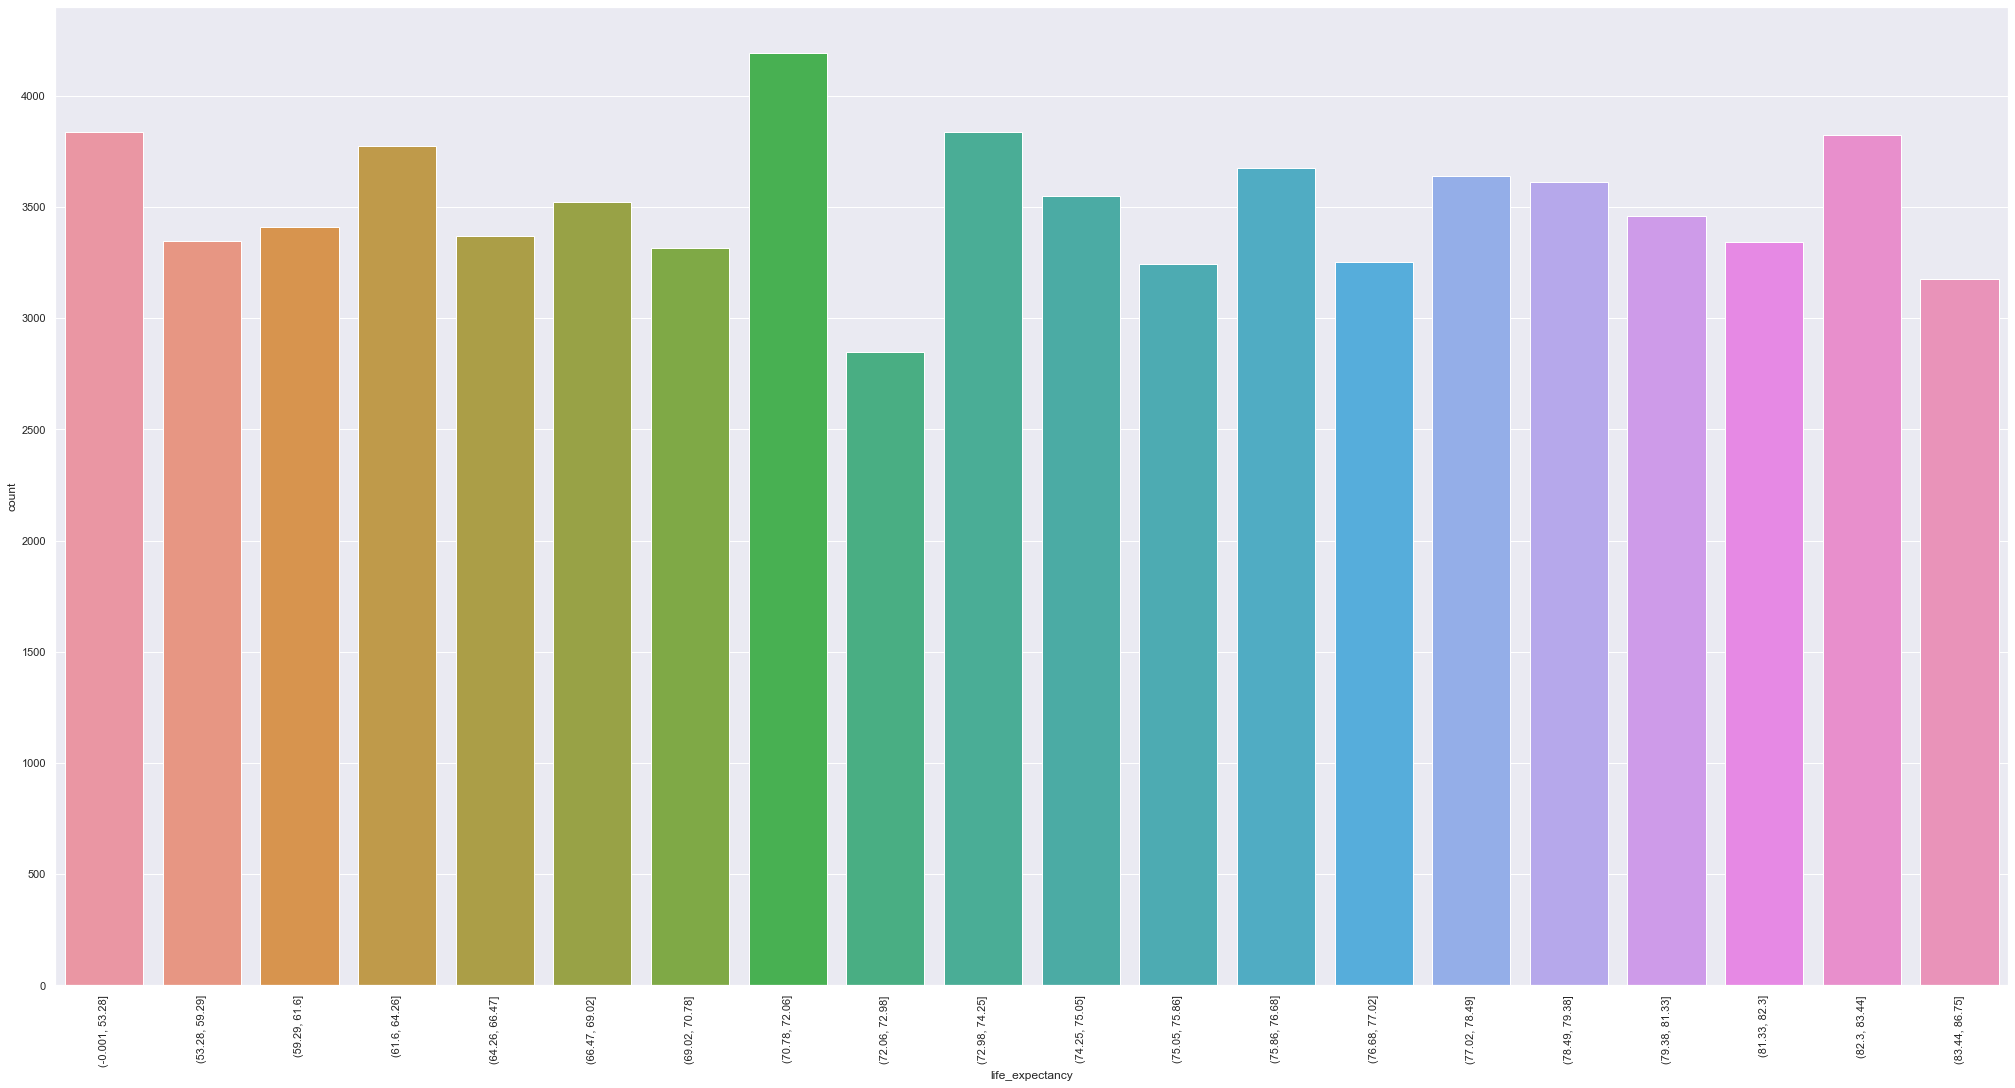

In [26]:
plt.figure(figsize=(35,18))
sns.countplot(x=df1)
plt.xticks(rotation=90)
plt.show()

In [27]:
df3=pd.qcut(df['female_smokers'], q=20,duplicates='drop')

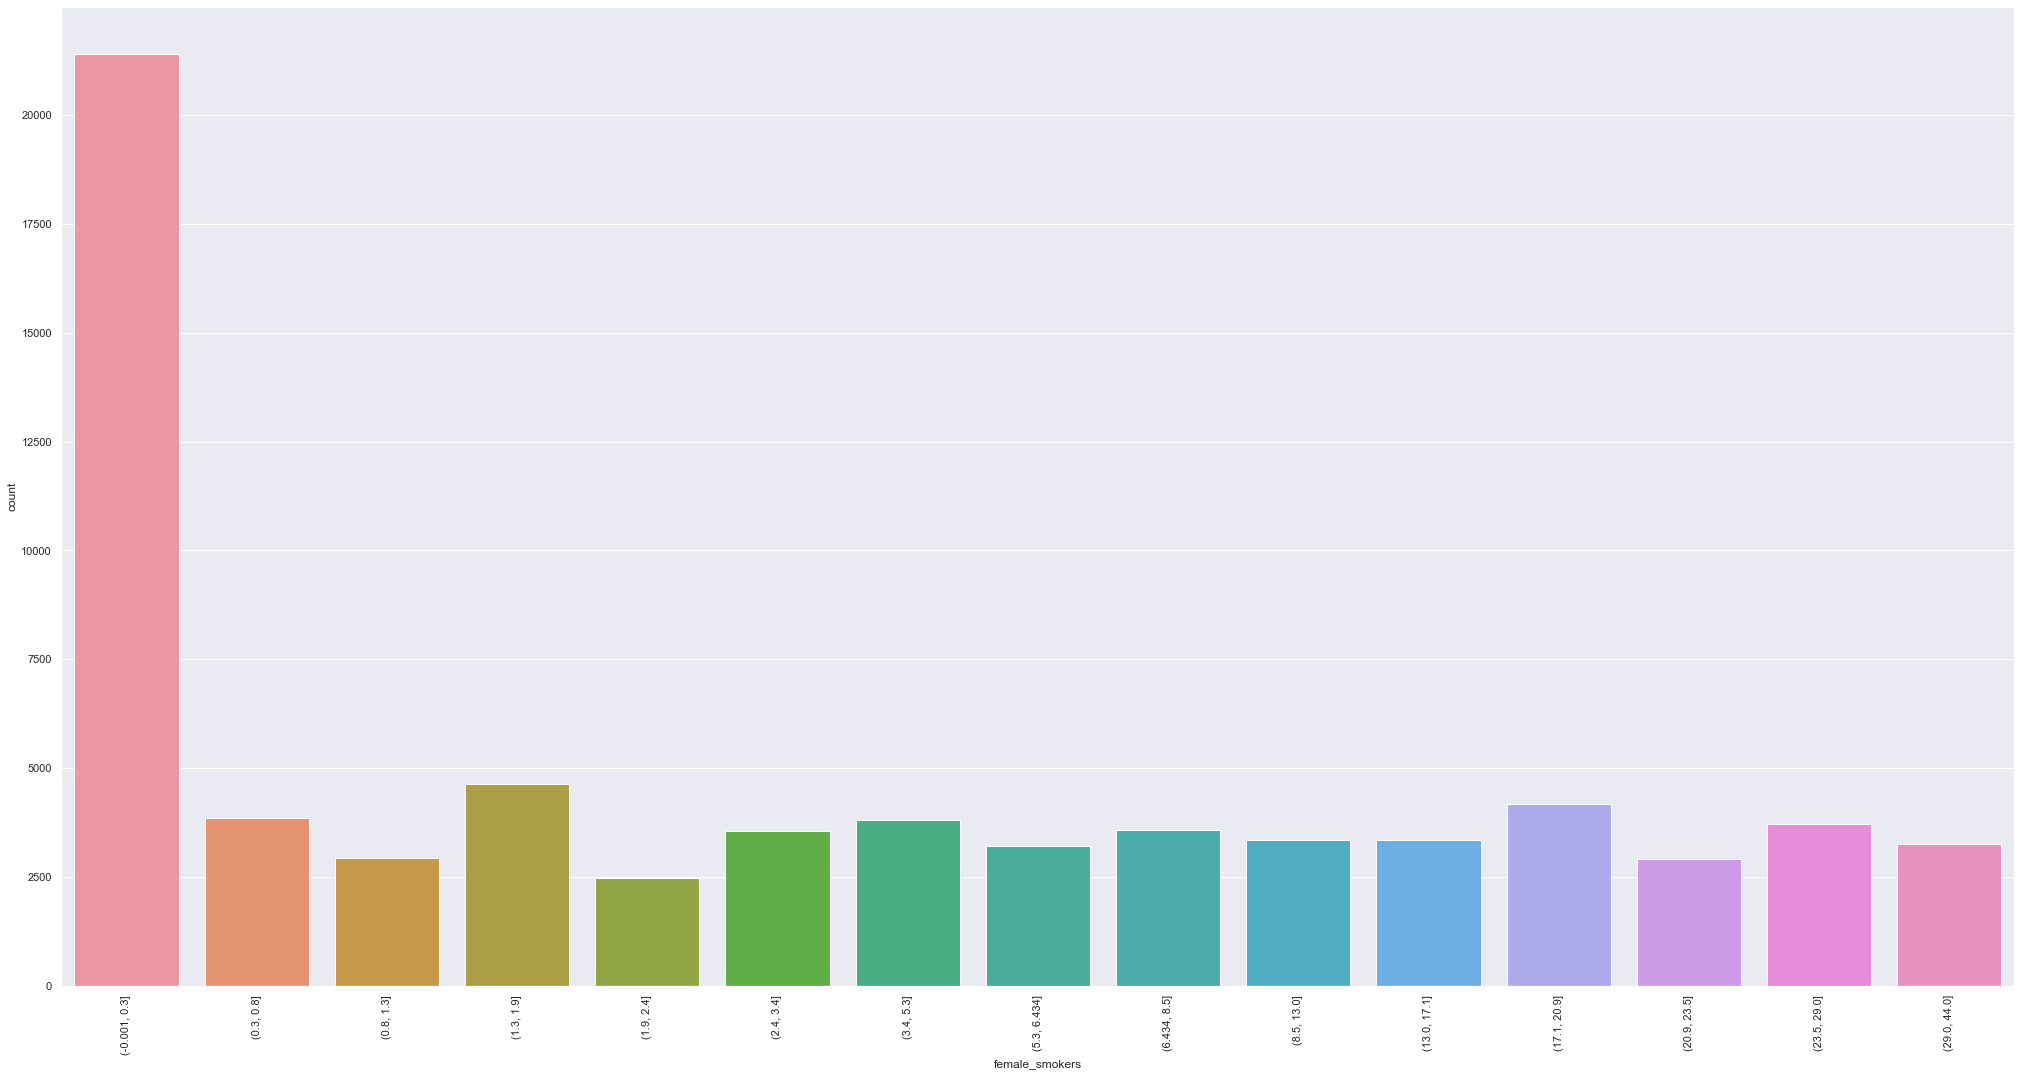

In [28]:
plt.figure(figsize=(35,18))
sns.countplot(x=df3)
plt.xticks(rotation=90)
plt.show()

In [29]:
df4=pd.qcut(df['new_cases'], q=10,duplicates='drop')

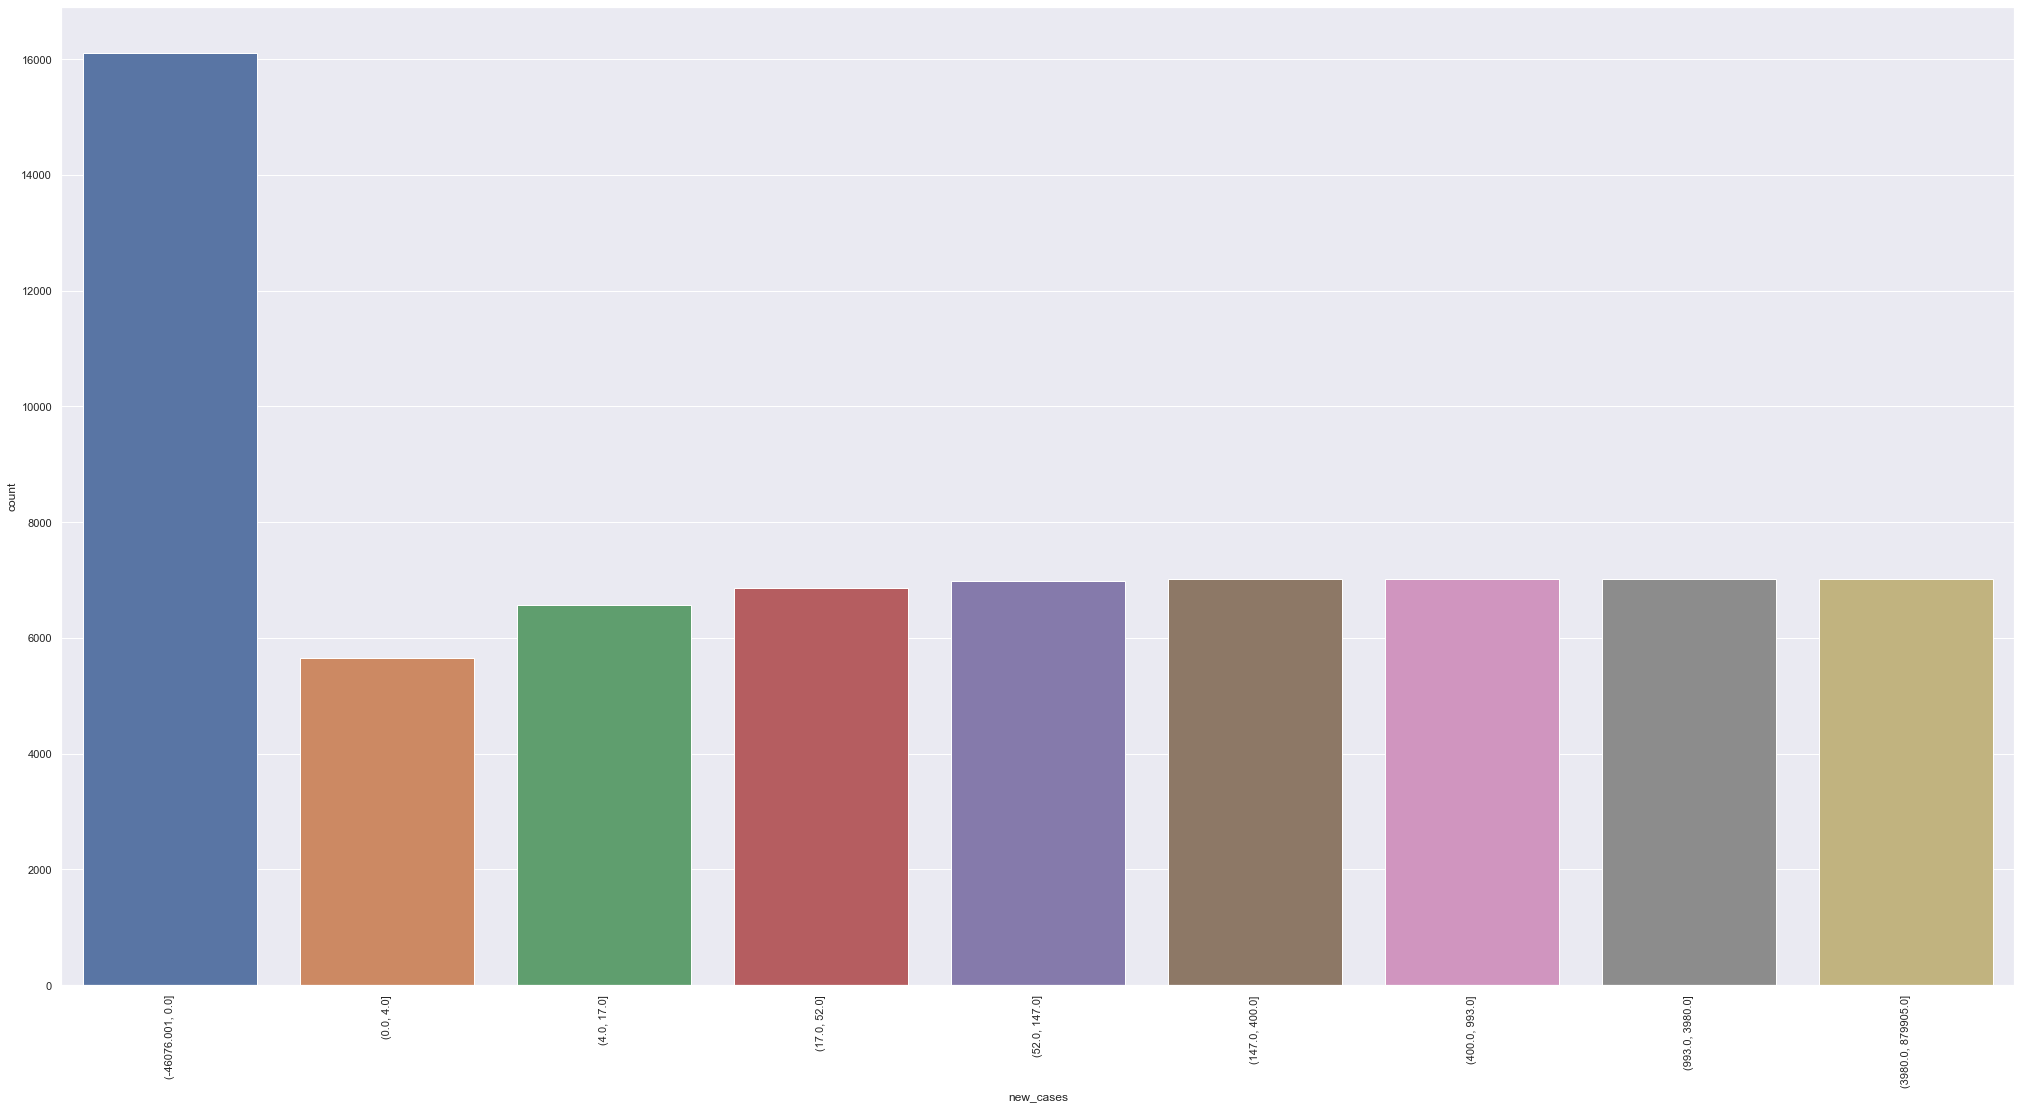

In [30]:
plt.figure(figsize=(35,18))
sns.countplot(x=df4)
plt.xticks(rotation=90)
plt.show()

In [31]:
# covid cases in usa

us=df[df["location"]=="United States"]
us.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66948,USA,North America,United States,2021-02-16,27756970.0,62459.0,80615.286,488081.0,1756.0,2180.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
66949,USA,North America,United States,2021-02-17,27826785.0,69815.0,77050.571,490540.0,2459.0,2062.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
66950,USA,North America,United States,2021-02-18,27896040.0,69255.0,71887.286,493098.0,2558.0,1977.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
66951,USA,North America,United States,2021-02-19,28006110.0,110070.0,73405.286,495804.0,2706.0,1951.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
66952,USA,North America,United States,2021-02-20,28077620.0,71510.0,71717.857,497648.0,1844.0,1906.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926


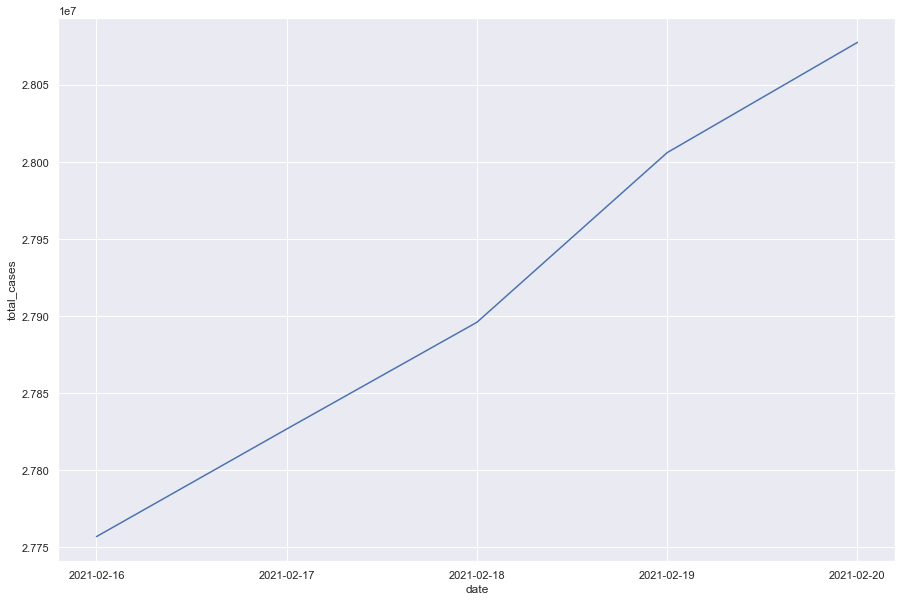

In [32]:
us_last_5_days=us.tail()
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=us_last_5_days)
plt.show()